# IV - 0D computations

Now, the evolution of a reactor, or a network of reactors -which are 0-D objects- with time, is performed
through an integrator object *ReactorNet* :<br>
<code><p style="text-align: center;">
... (define gases) ...
r1 = Reactor(gas1)
r2 = Reactor(gas2)
... (install walls, inlets, outlets, etc)...
reactor_network = ReactorNet([r1, r2])
time = 1 #s
reactor_network.advance(time)
</code></p><br>

There are two possibilities to advance a reactor simulation in time :
- the ***advance(self, double t)*** option (shown in the example above)<br>
This will advance the state of the reactor network in time from the current time to the specified 't' time, taking as many integrator timesteps as necessary.
- the ***step(self, double t)*** option. <br>
This will take a single internal time step toward the specified time 't' [s]... 
The use of 'advance' is recommended, unless you need to elucidate a bug.

## 2. Simple closed vessel

### Import statements

In [1]:
import sys
import numpy as np
import cantera as ct
import matplotlib.pyplot as plt
from matplotlib import *
import csv

In [2]:
gas = ct.Solution('BFER_methane.yaml', 'CH4_BFER_mix')
gas.TPX = 1000.0, ct.one_atm, {'CH4':1, 'O2':2, 'N2':7.52} 
a = print(gas())


  CH4_BFER_mix:

       temperature   1000 K
          pressure   1.0132e+05 Pa
           density   0.33676 kg/m^3
  mean mol. weight   27.633 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy        5.8795e+05        1.6247e+07  J
   internal energy        2.8706e+05        7.9325e+06  J
           entropy            8664.6        2.3943e+05  J/K
    Gibbs function       -8.0767e+06       -2.2319e+08  J
 heat capacity c_p            1340.7             37049  J/K
 heat capacity c_v            1039.8             28734  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                O2           0.22014           0.19011           -28.226
               CH4          0.055187          0.095057           -36.538
                N2           0.72467           0.71483          

In [3]:
# Prepare the simulation with a ReactorNet object
# Create Reactor and fill with gas
r = ct.Reactor(gas)
sim = ct.ReactorNet([r])
time = 0
b = print(gas())
if a == b:
    print("still same gas properties")
else:
    print("gas properties have changed")


  CH4_BFER_mix:

       temperature   1000 K
          pressure   1.0132e+05 Pa
           density   0.33676 kg/m^3
  mean mol. weight   27.633 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy        5.8795e+05        1.6247e+07  J
   internal energy        2.8706e+05        7.9325e+06  J
           entropy            8664.6        2.3943e+05  J/K
    Gibbs function       -8.0767e+06       -2.2319e+08  J
 heat capacity c_p            1340.7             37049  J/K
 heat capacity c_v            1039.8             28734  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                O2           0.22014           0.19011           -28.226
               CH4          0.055187          0.095057           -36.538
                N2           0.72467           0.71483          

In [4]:
# Arrays to hold the datas
n_points = 40000
times = np.zeros(n_points)
data = np.zeros((n_points, 4))

# Advance the simulation in time
# and print the internal evolution of temperature, volume and internal energy
print(('%10s %10s %10s %14s' % ('t [s]', 'T [K]', 'vol [m3]', 'u [J/kg]')))
for n in range(n_points):
    time += 8.e-8
    sim.advance(time)
    times[n] = time  # time in s
    data[n, 0] = r.T                               # set the temperature in the first column
    data[n, 1:] = r.thermo['O2', 'CO2', 'CH4'].X     # set the molar fractions in the other column
    print(('%10.3e %10.3f %10.3f %14.6e' % (sim.time, r.T,r.thermo.v, r.thermo.u)))

     t [s]      T [K]   vol [m3]       u [J/kg]
 8.000e-08   1000.003      2.969   2.870629e+05
 1.600e-07   1000.005      2.969   2.870629e+05
 2.400e-07   1000.007      2.969   2.870629e+05
 3.200e-07   1000.010      2.969   2.870629e+05
 4.000e-07   1000.012      2.969   2.870629e+05
 4.800e-07   1000.015      2.969   2.870629e+05
 5.600e-07   1000.017      2.969   2.870629e+05
 6.400e-07   1000.020      2.969   2.870629e+05
 7.200e-07   1000.022      2.969   2.870629e+05
 8.000e-07   1000.024      2.969   2.870629e+05
 8.800e-07   1000.027      2.969   2.870629e+05
 9.600e-07   1000.029      2.969   2.870629e+05
 1.040e-06   1000.032      2.969   2.870629e+05
 1.120e-06   1000.034      2.969   2.870629e+05
 1.200e-06   1000.037      2.969   2.870629e+05
 1.280e-06   1000.039      2.969   2.870629e+05
 1.360e-06   1000.042      2.969   2.870629e+05
 1.440e-06   1000.045      2.969   2.870629e+05
 1.520e-06   1000.047      2.969   2.870629e+05
 1.600e-06   1000.050      2.969   2.870

### Plot results

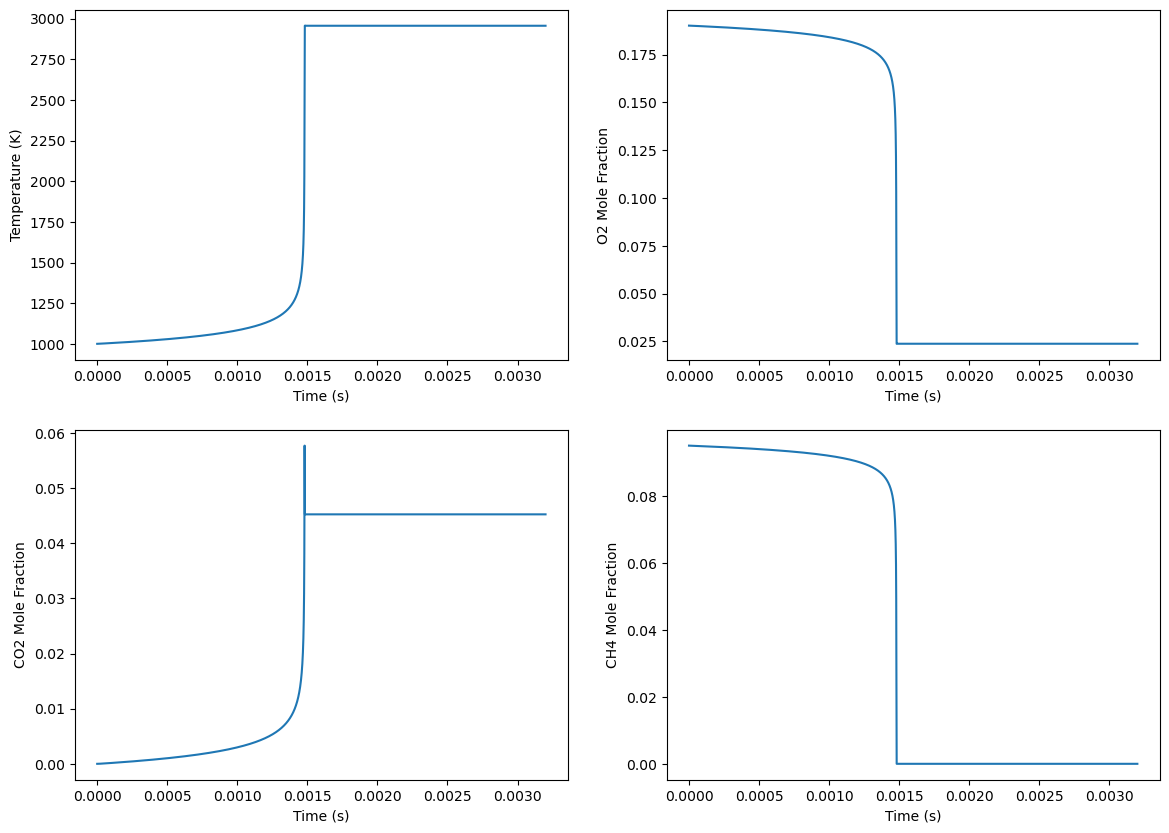

In [5]:
rcParams['figure.figsize'] = (14, 10)

plt.clf()

plt.subplot(2, 2, 1)
plt.plot(times, data[:, 0])
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')

plt.subplot(2, 2, 2)
plt.plot(times, data[:, 1])
plt.xlabel('Time (s)')
plt.ylabel('O2 Mole Fraction')

plt.subplot(2, 2, 3)
plt.plot(times, data[:, 2])
plt.xlabel('Time (s)')
plt.ylabel('CO2 Mole Fraction')

plt.subplot(2, 2, 4)
plt.plot(times, data[:, 3])
plt.xlabel('Time (s)')
plt.ylabel('CH4 Mole Fraction')

plt.show()

There are the characteristic evolutions that one can observe when simulating 0D cases. You should be aware that your case must auto-ignite (for some temperature, it is not sufficiently hot to auto-ignite, therefore nothing happens) and that the simulated time should be sufficient to capture the time where it ignites.

<div class="alert alert-danger "><b>Try to move the temperature of the gas state :<br>
- at 960 K<br>
- at 1040 K
<br><br>
What do you observe ?</b></div>

As you can see, slightly shifting the temperature up or down moves the auto-ignition time. As you never know a priori the order of magnitude of the ignition time, it is good to use the step version until you reach burnt gases.

## 3. A simple constant pressure reactor

Here, we want to create a simple constant pressure reactor. To do so, it is necessary to create a reactor and its environment (which will be a Reservoir). The interface between the two objects created is handled by a wall, of which the expansion rate can be defined by the user.

### Set the mechanism properties

In [6]:
gas = ct.Solution('BFER_methane.yaml', 'CH4_BFER_mix')
gas.TPX = 1000.0, ct.one_atm, {'CH4':1, 'O2':2, 'N2':7.52} 
a = print(gas())


  CH4_BFER_mix:

       temperature   1000 K
          pressure   1.0132e+05 Pa
           density   0.33676 kg/m^3
  mean mol. weight   27.633 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy        5.8795e+05        1.6247e+07  J
   internal energy        2.8706e+05        7.9325e+06  J
           entropy            8664.6        2.3943e+05  J/K
    Gibbs function       -8.0767e+06       -2.2319e+08  J
 heat capacity c_p            1340.7             37049  J/K
 heat capacity c_v            1039.8             28734  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                O2           0.22014           0.19011           -28.226
               CH4          0.055187          0.095057           -36.538
                N2           0.72467           0.71483          

<div class="alert alert-danger "><b> Try to set :<br>
- an IdealGasReactor object with the gri3 object created above<br>
- a Reservoir representing the environment with the air object created above
</p></div>

In [7]:
# Reactor and environment
r = ct.IdealGasReactor(gas)
env = ct.Reservoir(gas)

# Wall
w = ct.Wall(r, env)
w.expansion_rate_coeff = 1.0e6  # set expansion parameter. dV/dt = KA(P_1 - P_2)
w.area = 1.0

# Prepare the simulation with a ReactorNet object
sim = ct.ReactorNet([r])
time = 0

As explained in the lecture, note that the environment defines the air in which the reactor is set in. We also define a wall between the reactor and the environment, and make it flexible, so that the pressure in the reactor is held at the environment pressure.

### Simulate the reactor

In [8]:
# Arrays to hold the datas
times = np.zeros(40000)
data = np.zeros((40000, 4))

# Advance the simulation in time
print(('%10s %10s %10s %14s' % ('t [s]', 'T [K]', 'P [Pa]', 'h [J/kg]')))
for n in range(40000):
    time += 8.e-8
    sim.advance(time)
    times[n] = time  # time in s
    data[n, 0] = r.T
    data[n, 1:] = r.thermo['O2', 'CO2', 'CH4'].X
    #print(('%10.3e %10.3f %10.3f %14.6e' % (sim.time, r.T,
                                         #   r.thermo.P, r.thermo.h)))

     t [s]      T [K]     P [Pa]       h [J/kg]


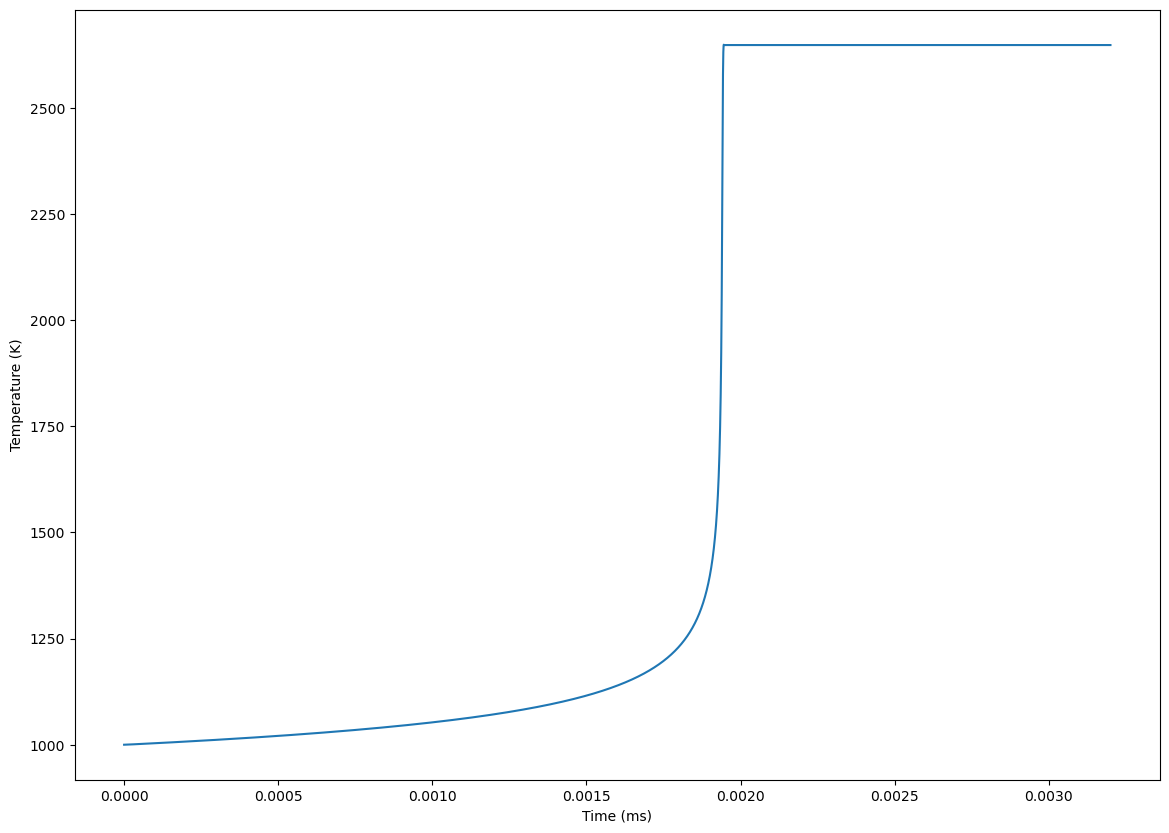

In [9]:
rcParams['figure.figsize'] = (14, 10)

plt.clf()
plt.plot(times, data[:, 0])
plt.xlabel('Time (ms)')
plt.ylabel('Temperature (K)')

# plt.subplot(2, 2, 2)
# plt.plot(times, data[:, 1])
# plt.xlabel('Time (ms)')
# plt.ylabel('O2 Mole Fraction')

# plt.subplot(2, 2, 3)
# plt.plot(times, data[:, 2])
# plt.xlabel('Time (ms)')
# plt.ylabel('CO2 Mole Fraction')

# plt.subplot(2, 2, 4)
# plt.plot(times, data[:, 3])
# plt.xlabel('Time (ms)')
# plt.ylabel('CH4 Mole Fraction')

plt.show()

<div class="alert alert-danger "> Try to modify the script by creating an <b> IdealGasConstPressureReactor </b> instead of setting the environment into a reservoir to maintain the pressure.</div>

### Reset gas state and set the new IdealGasConstPressureReactor

In [10]:
# Mechanisms used for the process
gas1 = ct.Solution('BFER_methane.yaml')

# Gas state
gas1.TPX = 1000.0, ct.one_atm, {'CH4':1, 'O2':2, 'N2':7.52} 

r = ct.IdealGasConstPressureReactor(gas1)

# Prepare the simulation with a ReactorNet object
sim = ct.ReactorNet([r])
time = 0

In [12]:
gas1()


  CH4_BFER:

       temperature   1000 K
          pressure   1.0132e+05 Pa
           density   0.33676 kg/m^3
  mean mol. weight   27.633 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy        5.8795e+05        1.6247e+07  J
   internal energy        2.8706e+05        7.9325e+06  J
           entropy            8664.6        2.3943e+05  J/K
    Gibbs function       -8.0767e+06       -2.2319e+08  J
 heat capacity c_p            1340.7             37049  J/K
 heat capacity c_v            1039.8             28734  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                O2           0.22014           0.19011           -28.226
               CH4          0.055187          0.095057           -36.538
                N2           0.72467           0.71483           -25

### Simulate the new case

In [13]:
# Arrays to hold the datas
times = np.zeros(40000)
data = np.zeros((40000, 4))

# Advance the simulation in time
print(('%10s %10s %10s %14s' % ('t [s]', 'T [K]', 'P [Pa]', 'h [J/kg]')))
for n in range(40000):
    time += 8.e-8
    sim.advance(time)
    times[n] = time  # time in s
    data[n, 0] = r.T
    data[n, 1:] = r.thermo['O2', 'CO2', 'CH4'].X
    #print(('%10.3e %10.3f %10.3f %14.6e' % (sim.time, r.T,
                                            #r.thermo.P, r.thermo.h)))

     t [s]      T [K]     P [Pa]       h [J/kg]


### Plot the results and compare with the previous one

In [14]:
gas1()


  CH4_BFER:

       temperature   2648.2 K
          pressure   1.0132e+05 Pa
           density   0.12497 kg/m^3
  mean mol. weight   27.156 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy        5.8795e+05        1.5966e+07  J
   internal energy       -2.2286e+05       -6.0519e+06  J
           entropy             10217        2.7745e+05  J/K
    Gibbs function       -2.6468e+07       -7.1877e+08  J
 heat capacity c_p            1538.7             41786  J/K
 heat capacity c_v            1232.6             33471  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                O2          0.020358          0.017277           -33.861
               H2O           0.12394           0.18683           -41.435
               CH4       -1.1951e-13        -2.023e-13           -

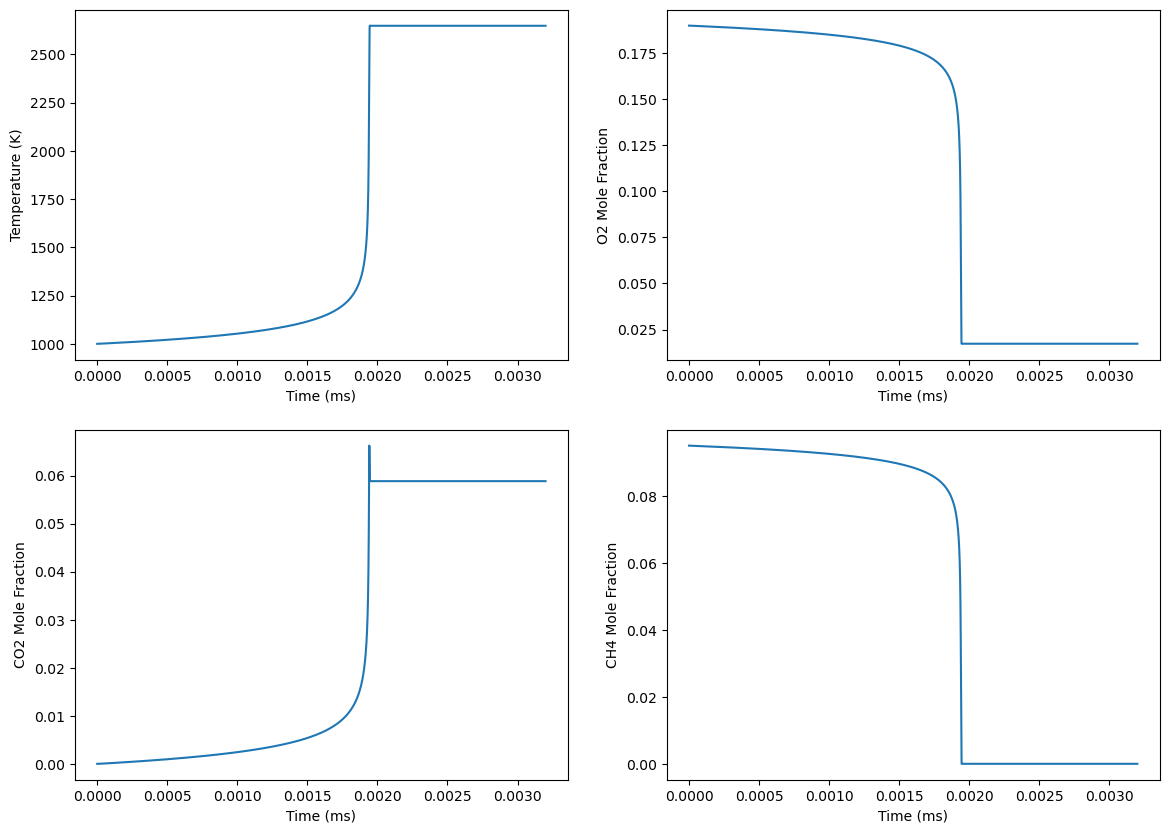

In [15]:
rcParams['figure.figsize'] = (14, 10)

plt.clf()

plt.subplot(2, 2, 1)
plt.plot(times, data[:, 0])
plt.xlabel('Time (ms)')
plt.ylabel('Temperature (K)')

plt.subplot(2, 2, 2)
plt.plot(times, data[:, 1])
plt.xlabel('Time (ms)')
plt.ylabel('O2 Mole Fraction')

plt.subplot(2, 2, 3)
plt.plot(times, data[:, 2])
plt.xlabel('Time (ms)')
plt.ylabel('CO2 Mole Fraction')

plt.subplot(2, 2, 4)
plt.plot(times, data[:, 3])
plt.xlabel('Time (ms)')
plt.ylabel('CH4 Mole Fraction')

plt.show()

## 4. An example of application : mixing two streams

Up until now, we have seen how to generate simple closed vessels. However, it is sometimes interesting
to mix different streams, or to feed the exhaust of a reservoir with constant parameters to a reacting
reactor. In this exercise, we will design a script that simulates the stoichiometric constant volume
mixing of a stream of air with a stream of pure gaseous methane.

![title](Images/Scheme.png)

### Set the two gases and the molar mass associated

<div class="alert alert-danger "><b> You will have to :<br>
- set a first gas a with an air mixture at 0.21 of O2, 0.01 of AR and 0.78 of N2<br>
- set a second gas b with a gri30 mixture at 1 of CH4
<b></div>

In [ ]:
gas_a = ct.Solution('air.xml')
gas_a.TPX = 300, ct.one_atm, 'O2:0.21, N2:0.78, AR:0.01'
mw_a = gas_a.mean_molecular_weight/1000 #kg/mol

gas_b = ct.Solution('gri30.xml')
gas_b.TPX = 300.0, ct.one_atm, 'CH4:1'
mw_b = gas_b.mean_molecular_weight/1000 #kg/mol

### Creation of two reservoirs and an exhaust one (ReactorBase)

<div class="alert alert-danger "><b> You will have to :<br>
- set a first reservoir from gas a<br>
- set a second reservoir from gas b<br>
- set a downstream reservoir filled with gas b
<b></div>

In [ ]:
res_a = ct.Reservoir(gas_a)
res_b = ct.Reservoir(gas_b)
downstream = ct.Reservoir(gas_b)

### Generate the reactor that will receive the mixed stream (ReactorBase)

<div class="alert alert-danger "><b> You will have to :<br>
- change the condition of the gas b to respect an air mix.<br>
- create and IdealGasReactor with the energy equation set to 'on'.
<b></div>

In [ ]:
gas_b.TPX = 300, ct.one_atm, 'O2:1., N2:3.78, CH4:0.5'
mixer = ct.IdealGasReactor(gas_b, energy='on')

Watch out here, the mixture should be the one of gas_b, as the reactions will occur with the mechanism from gri30 (and not from the air).

### Creation of the mass flow controller that will control the mixing (FlowDevice)

Now that you have specified all the elements of the reactor, you need to detail the link between them. This is what is done in the following lines :

In [ ]:
mfca = ct.MassFlowController(res_a, mixer, mdot=mw_a*2./0.21)
mfcb = ct.MassFlowController(res_b, mixer, mdot=mw_b*1.0)

### Creation of the valve between the mixer and the downstream (FlowDevice)

Finally, the valve is created.

In [ ]:
outlet = ct.Valve(mixer, downstream, K=10.0)

This valve will enable the system to keep a constant pressure at the inlet of the mixer and at the outlet.

### Creation of the net reactor to compute simulation

<div class="alert alert-danger "><b> You need to create the ReactorNet with the mixer. <b></div>

In [ ]:
sim = ct.ReactorNet([mixer])

In [ ]:
# Since the mixer is a reactor, we need to integrate in time to reach steady
# state. A few residence times should be enough.
print('{0:>14s} {1:>14s} {2:>14s} {3:>14s} {4:>14s}'.format('t [s]', 'T [K]', 'h [J/kg]', 'P [Pa]', 'X_CH4'))
t = 0.0
for n in range(100):
    tres = mixer.mass/(mfca(t) + mfcb(t))
    t += 2*tres
    sim.advance(t)
    print('{0:14.5g} {1:14.5g} {2:14.5g} {3:14.5g} {4:14.5g}'.format(t, mixer.T, mixer.thermo.h, mixer.thermo.P, mixer.thermo['CH4'].X[0]))

print(mixer.thermo.report())

Notice that the gas did not ignite, and that the composition is indeed stoichiometric. We could trigger
the ignition, by assuming that the reactor is 'already lit'. To do so, you need to initialize the content
of the reactor with hot gases. The simplest way to do so is by filling it with stoichiometric mixture of
air and methane at equilibrium. This is easily done by replacing the lines :<br>
<code>
gas_b.TPX = 300.0, ct.one_atm, 'O2:0.21, N2:0.78, AR:0.01'
mixer = ct.IdealGasReactor(gas_b)
</code><br>
with :
<br><code>
gas_b.TPX = 300.0,ct.one_atm,'O2:1., N2:3.78, CH4:0.5'
gas_b.equilibrate("HP")
mixer = ct.IdealGasReactor(gas_b)
</code>

## 5. Autoignition timing

An interesting feature of 0D simulations is that it allows to compute the temporal evolution of a
mixture under specific conditions towards its equilibrium state. That evolution can be viewed as
a sort of **autoignition** of the mixture.<br>
To go further, that last exercise will guide you through
such a computation of the autoignition timing of a methane/air mixture. Several definitions of the
autoignition timing can be found in the literature. The most commonly accepted definition relies
on the temperature gradient : the time of the sharpest temperature increase is spotted as being the
autoignition point. In order to catch this time with precision, the time step of the simulation should
be as small as possible.

### Create the gas object

In [16]:
gas = ct.Solution('gri30.yaml')
gas.TPX = 1250, ct.one_atm, 'CH4:0.5, O2:1, N2:3.76'

### Initialisation of the different values

In [ ]:
# Initial temperatures
Temperature_range = list(range(800, 1700, 100))

# Specify the number of time steps and the time step size
nt = 100000
dt = 1.e-4  # s

# Storing auto ignitions
auto_ignitions = []

In [ ]:
for index, Temperature in enumerate(Temperature_range):
    #################################################################
    # Initial temperature, Pressure and stoichiometry
    gas.TPX = Temperature, ct.one_atm, 'CH4:0.5, O2:1, N2:3.76'
    # Create the batch reactor
    r = ct.IdealGasReactor(gas)
    # Now create a reactor network consisting of the single batch reactor
    sim = ct.ReactorNet([r])
    # Storage space
    mfrac = []
    # ...
    time = []
    temperature = []
    HR = []
    # Run the simulation
    # Initial simulation time
    current_time = 0.0
    # Loop for nt time steps of dt seconds.
    for n in range(nt):
        current_time += dt
        sim.advance(current_time)
        time.append(current_time)
        temperature.append(r.T)
        mfrac.append(r.thermo.Y)
        HR.append(- np.dot(gas.net_production_rates, gas.partial_molar_enthalpies))
    #################################################################
    # Catch the autoignition timing
    #################################################################
    # Get the ignition delay time by the maximum value of the Heat Release rate
    auto_ignition = time[HR.index(max(HR))]
    print('For T = ' + str(Temperature) + ', Autoignition time = ' + str(auto_ignition) + ' s')
    # Posterity
    FinalTemp = temperature[nt - 1]
    auto_ignitions.append(auto_ignition)
    # #################################################################
    # # Save results
    # #################################################################
    # # write output CSV file for importing into Excel
    # csv_file = '3-Output/Phi-1_P-1_T-' + str(Temperature) + '_UV.csv'
    # with open(csv_file, 'w') as outfile:
    # writer = csv.writer(outfile)
    # writer.writerow(['Auto ignition time [s]', 'Final Temperature [K]'] + gas.species_names)
    # writer.writerow([auto_ignition, FinalTemp] + list(mfrac[:]))
    # print('output written to ' + csv_file)
T_invert = [1000 / Temperature for Temperature in Temperature_range]

In [ ]:
#################################################################
# Plot results
#################################################################
# create plot
plt.plot(Temperature_range, auto_ignitions, 'b-o')
plt.xlabel(r'Temperature [K]')
plt.ylabel("Auto ignition [s]")
plt.yscale('log')
plt.title(r'Autoignition of $CH_{4}$ + Air mixture at $\Phi$ = 1, and P = 1 bar',
fontsize=22, horizontalalignment='center')
plt.axis()
plt.grid()
plt.show()

This is a typical curve of the auto-ignition time as a function of the initial temperature, meaning that when the temperature increases, this time is reduced.